# ML Project

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import combinations
import collections
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.utils import resample

## 2. Data Preprocessing

In [2]:
heart_2020_cleaned_df = pd.read_csv("data/heart_2020_cleaned.csv")
print("\n Heart 2020 Cleaned \n")
print(heart_2020_cleaned_df.info())


 Heart 2020 Cleaned 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 1

In [3]:
print("\n NA Values \n")
print(heart_2020_cleaned_df.isna().sum())


 NA Values 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [4]:
heart_2020_cleaned_df.head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44


In [5]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = heart_2020_cleaned_df.copy()
df_tmp = pd.get_dummies(df_tmp, columns=['Sex', 'Race']) # one hot encoding for sex and race 
df_tmp.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

### 2.1 Converting strings (object) to categories

In [6]:
print("Labels for which data is string:")
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Labels for which data is string:
HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
AgeCategory
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


In [7]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   HeartDisease                         319795 non-null  category
 1   BMI                                  319795 non-null  float64 
 2   Smoking                              319795 non-null  category
 3   AlcoholDrinking                      319795 non-null  category
 4   Stroke                               319795 non-null  category
 5   PhysicalHealth                       319795 non-null  float64 
 6   MentalHealth                         319795 non-null  float64 
 7   DiffWalking                          319795 non-null  category
 8   AgeCategory                          319795 non-null  category
 9   Diabetic                             319795 non-null  category
 10  PhysicalActivity                     319795 non-null  category
 11  

In [8]:
df_tmp.AgeCategory.cat.categories

Index(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype='object')

In [9]:
df_tmp.GenHealth.cat.codes

0         4
1         4
2         1
3         2
4         4
         ..
319790    1
319791    4
319792    2
319793    2
319794    2
Length: 319795, dtype: int8

#### All of our data is categorical and thus we can now turn the categories into numbers.

### 2.2 Saving Processed Data

In [10]:
# Saving
df_tmp.to_csv("data/heart_2020_cleaned_preprocessed.csv", index=False)

In [11]:
# Importing
df_tmp = pd.read_csv("data/heart_2020_cleaned_preprocessed.csv")
df_tmp.head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,No,No,No,No,Yes
AgeCategory,55-59,80 or older,65-69,75-79,40-44
Diabetic,Yes,No,Yes,No,No


### 2.3 Turning categorical values to numbers

In [12]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
AgeCategory
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


In [13]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes

In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int8   
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int8   
 3   AlcoholDrinking                      319795 non-null  int8   
 4   Stroke                               319795 non-null  int8   
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int8   
 8   AgeCategory                          319795 non-null  int8   
 9   Diabetic                             319795 non-null  int8   
 10  PhysicalActivity                     319795 non-null  int8   
 11  GenHealth    

In [15]:
df_tmp.head().T

,0,1,2,3,4
HeartDisease,0.0,0.00,0.00,0.00,0.00
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,1.0,0.00,1.00,0.00,0.00
AlcoholDrinking,0.0,0.00,0.00,0.00,0.00
Stroke,0.0,1.00,0.00,0.00,0.00
PhysicalHealth,3.0,0.00,20.00,0.00,28.00
MentalHealth,30.0,0.00,30.00,0.00,0.00
DiffWalking,0.0,0.00,0.00,0.00,1.00
AgeCategory,7.0,12.00,9.00,11.00,4.00
Diabetic,2.0,0.00,2.00,0.00,0.00


In [16]:
from sklearn.preprocessing import MinMaxScaler
# create the scaler object
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(df_tmp)

# create a new DataFrame with the normalized data
df_normalized = pd.DataFrame(normalized_data, columns=df_tmp.columns)

print(df_normalized.head())

   HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           0.0  0.055294      1.0              0.0     0.0        0.100000   
1           0.0  0.100447      0.0              0.0     1.0        0.000000   
2           0.0  0.175782      1.0              0.0     0.0        0.666667   
3           0.0  0.147169      0.0              0.0     0.0        0.000000   
4           0.0  0.141132      0.0              0.0     0.0        0.933333   

   MentalHealth  DiffWalking  AgeCategory  Diabetic  ...  KidneyDisease  \
0           1.0          0.0     0.583333  0.666667  ...            0.0   
1           0.0          0.0     1.000000  0.000000  ...            0.0   
2           1.0          0.0     0.750000  0.666667  ...            0.0   
3           0.0          0.0     0.916667  0.000000  ...            0.0   
4           0.0          1.0     0.333333  0.000000  ...            0.0   

   SkinCancer  Sex_Female  Sex_Male  Race_American Indian/Alaskan Native  

### 2.4 Train - Test Split

In [17]:
# Split data into X and y
X = df_normalized.drop("HeartDisease", axis=1)
print(X.shape)
y = df_normalized["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape)

(319795, 23)
(255836, 23)


In [18]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.583333,0.666667,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.750000,0.666667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.916667,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.333333,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HeartDisease, dtype: float64

In [20]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
130307,0.224436,1.0,0.0,0.0,0.666667,0.0,0.0,0.916667,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32983,0.134613,0.0,0.0,0.0,0.000000,0.0,0.0,0.916667,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96817,0.137752,1.0,0.0,1.0,0.000000,0.0,0.0,0.666667,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
126649,0.125921,0.0,0.0,0.0,0.033333,0.0,0.0,0.583333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
290441,0.112037,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
y_train.head()

130307    0.0
32983     0.0
96817     0.0
126649    0.0
290441    0.0
Name: HeartDisease, dtype: float64

In [22]:
# k fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=21) # random_state is hardcoded to ensure reproducibility

folds = {}
counter = 1

for train_index, test_index in kf.split(X_train, y_train):
    # Simply doing X[train_index] does not work, need to use .iloc
    # which provides integer-location based indexing, regardless of index values
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    print(len(X_train_fold)/(len(X_train_fold)+len(X_test_fold)))
    folds[counter] = [X_train_fold, y_train_fold, X_test_fold, y_test_fold]
    counter += 1

folds.keys()

0.8999984364983817
0.8999984364983817
0.8999984364983817
0.8999984364983817
0.8999984364983817
0.8999984364983817
0.9000023452524273
0.9000023452524273
0.9000023452524273
0.9000023452524273


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [23]:
# perform undersampling

Xy_pairs = {}

for fold_number in range(1, len(folds)+1):
    Xy_pairs[fold_number] = {} # init
    Xtrain_fold = folds[fold_number][0]
    
    ytrain_fold = folds[fold_number][1]
    print(ytrain_fold.value_counts()[0])
    print(ytrain_fold.value_counts()[1])
    zero_indices = ytrain_fold.where(ytrain_fold == 0).dropna().index # indices where y=0
    one_indices = ytrain_fold.where(ytrain_fold == 1).dropna().index # indices where y=1
    
    num_positive = len(one_indices)
    for cnt in range(1, 10): # undersample
        Xtrain_sample_label_0 = resample(Xtrain_fold.loc[zero_indices], replace=False, n_samples=cnt*num_positive, random_state=21)
        ytrain_sample_label_0 = resample(ytrain_fold.loc[zero_indices], replace=False, n_samples=cnt*num_positive, random_state=21)
        Xy_pairs[fold_number][cnt] = [pd.concat([Xtrain_sample_label_0, Xtrain_fold.loc[one_indices]], axis=0), pd.concat([ytrain_sample_label_0, ytrain_fold.loc[one_indices]], axis=0)]

    # indexing into Xy_pairs = Xy_pairs[fold_number 1 to 10][subsample number 1-9]
    # subsample number 1 means 1:1 distribution (label 0: label 1), 2 means 2:1 distribution
    
    
    

210639
19613
210577
19675
210581
19671
210595
19657
210555
19697
210503
19749
210656
19597
210615
19638
210621
19632
210631
19622


## 3. Exploratory Data Analysis

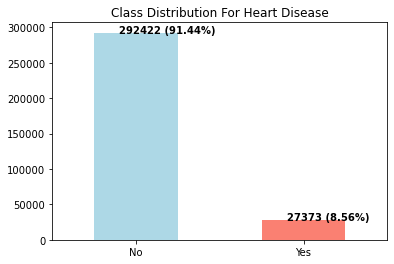

In [24]:
counts = heart_2020_cleaned_df["HeartDisease"].value_counts()
percentage = round(counts / counts.sum() * 100, 2)

ax = counts.plot(kind="bar", color=["lightblue", "salmon"])
plt.title("Class Distribution For Heart Disease")
plt.xticks(rotation=0)

for i, v in enumerate(counts):
    ax.text(i - 0.1, v + 10, f"{v} ({percentage[i]}%)", color="black", fontweight="bold")

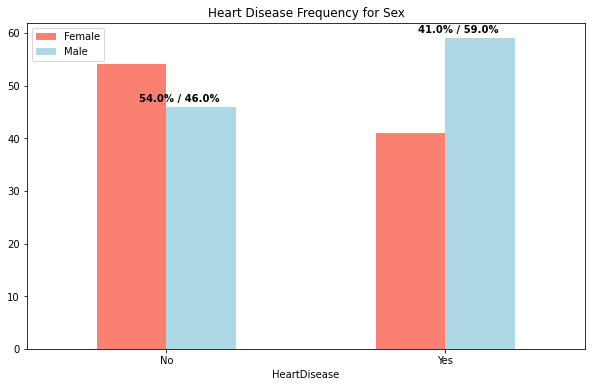

In [25]:
ct = pd.crosstab(heart_2020_cleaned_df.HeartDisease, heart_2020_cleaned_df.Sex, normalize="index")
ct = ct.round(2) * 100

ax = ct.plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

for i, v in enumerate(ct.values):
    ax.text(i - 0.1, v[1] + 1, f"{v[0]}% / {v[1]}%", color="black", fontweight="bold")

### Correlation

In [26]:
df_normalized.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.233432,0.168553,...,0.145197,0.093317,-0.070040,0.070040,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.004744,0.202472,...,0.050768,-0.033644,-0.026940,0.026940,0.026347,-0.078643,0.080672,0.023750,0.012535,-0.049060
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.128331,0.053847,...,0.034920,0.033977,-0.085052,0.085052,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.059528,-0.057372,...,-0.028280,-0.005702,-0.004200,0.004200,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.137822,0.101518,...,0.091167,0.048116,0.003091,-0.003091,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.110763,0.151361,...,0.142197,0.041700,0.040904,-0.040904,0.022955,-0.035229,0.011371,-0.005571,0.016102,-0.003968
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.155506,0.032945,...,0.037281,-0.033412,0.100058,-0.100058,0.018394,-0.023113,0.010944,0.011167,0.031385,-0.024489
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.243263,0.205502,...,0.153064,0.064840,0.068860,-0.068860,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,1.000000,0.193745,...,0.123190,0.263537,0.067478,-0.067478,-0.025190,-0.083885,-0.034980,-0.162338,-0.061239,0.193823
Diabetic,0.168553,0.202472,0.053847,-0.057372,0.101518,0.151361,0.032945,0.205502,0.193745,1.000000,...,0.142917,0.032523,0.013456,-0.013456,0.027615,-0.006388,0.053607,0.011321,0.010988,-0.050822


#### If the two variables tend to increase and decrease together, the correlation value is positive. If one variable increases while the other variable decreases, the correlation value is negative.

(24.5, -0.5)

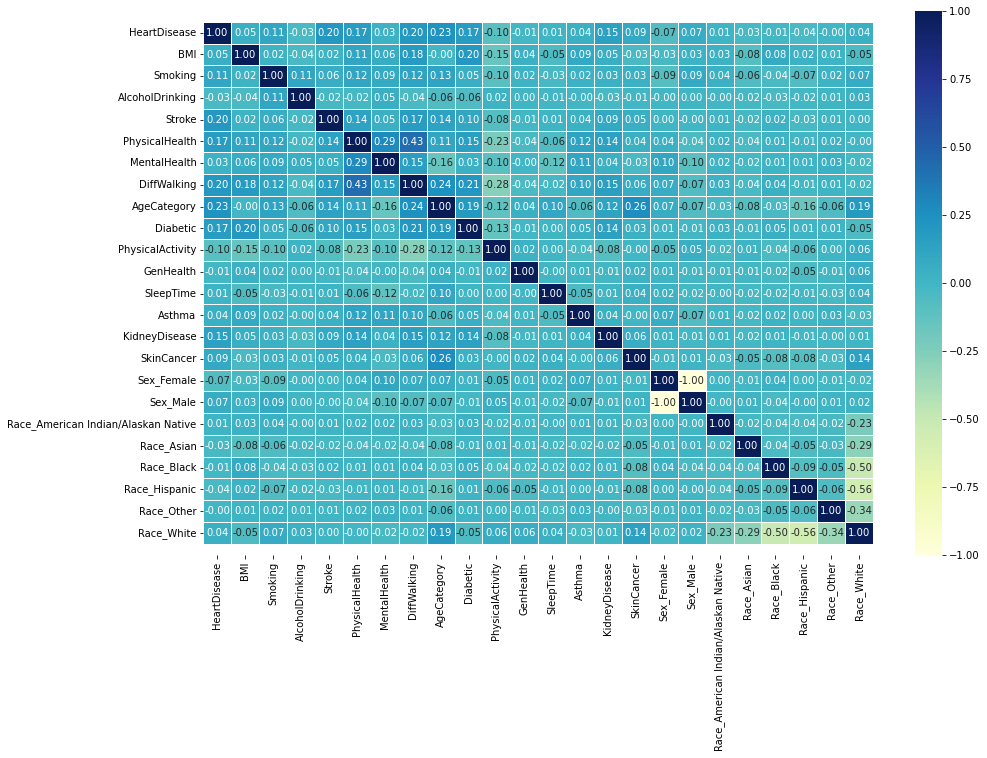

In [27]:
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Analysing Age Category, Diff Walking, Stroke, PhysicalHealth and Diabetic as they have highest values

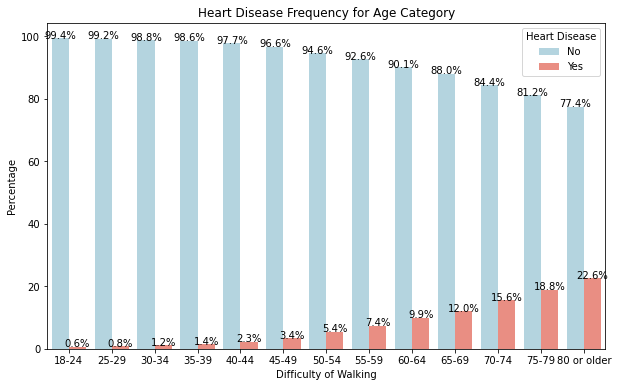

In [28]:
percentages = heart_2020_cleaned_df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AgeCategory', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for Age Category")
plt.xlabel("Difficulty of Walking")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

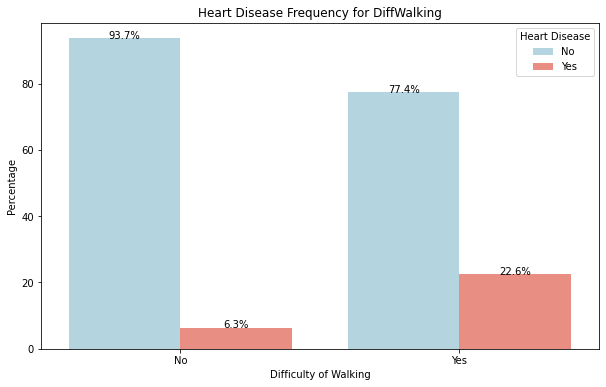

In [29]:
percentages = heart_2020_cleaned_df.groupby('DiffWalking')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='DiffWalking', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for DiffWalking")
plt.xlabel("Difficulty of Walking")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')
    
plt.show()

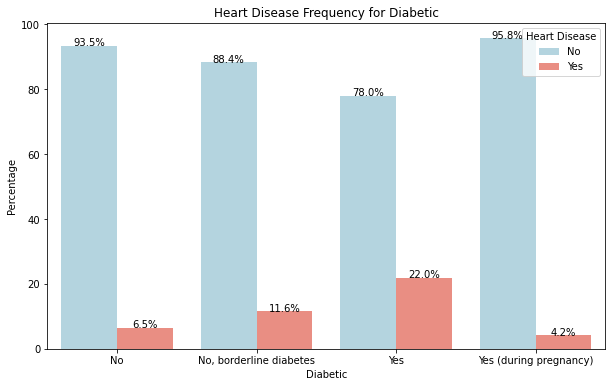

In [30]:
percentages = heart_2020_cleaned_df.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Diabetic', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for Diabetic")
plt.xlabel("Diabetic")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

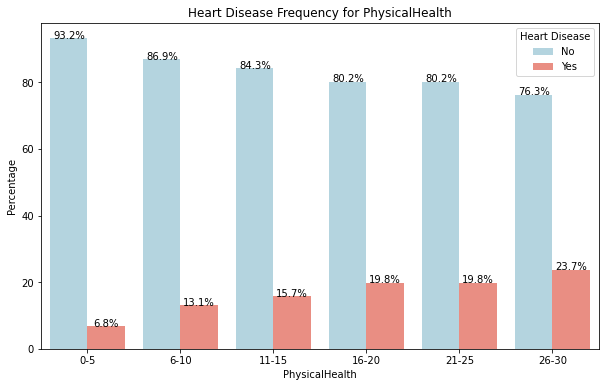

In [31]:
PhysicalHealth_categories = {
    0.0: '0-5',
    1.0: '0-5',
    2.0: '0-5',
    3.0: '0-5',
    4.0: '0-5',
    5.0: '0-5',
    6.0: '6-10',
    7.0: '6-10',
    8.0: '6-10',
    9.0: '6-10',
    10.0: '6-10',
    11.0: '11-15',
    12.0: '11-15',
    13.0: '11-15',
    14.0: '11-15',
    15.0: '11-15',
    16.0: '16-20',
    17.0: '16-20',
    18.0: '16-20',
    19.0: '16-20',
    20.0: '16-20',
    21.0: '21-25',
    22.0: '21-25',
    23.0: '21-25',
    24.0: '21-25',
    25.0: '21-25',
    26.0: '26-30',
    27.0: '26-30',
    28.0: '26-30',
    29.0: '26-30',
    30.0: '26-30'
}

order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

heart_2020_cleaned_df['PhysicalHealthCategory'] = heart_2020_cleaned_df['PhysicalHealth'].map(PhysicalHealth_categories)

percentages = heart_2020_cleaned_df.groupby('PhysicalHealthCategory')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PhysicalHealthCategory', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'], order=order)
plt.title("Heart Disease Frequency for PhysicalHealth")
plt.xlabel("PhysicalHealth")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')


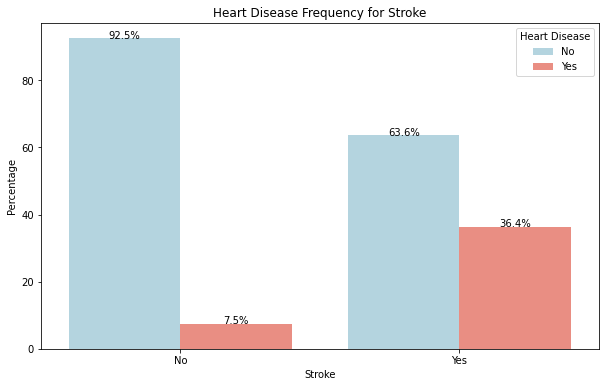

In [32]:
percentages = heart_2020_cleaned_df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Stroke', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for Stroke")
plt.xlabel("Stroke")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

## 4. Trying out sample model

In [34]:
model = LogisticRegression(n_jobs=-1, max_iter=150)
for fold_number in folds.keys():
    print(fold_number)
    model.fit(folds[fold_number][0], folds[fold_number][1])
    print(model.score(folds[fold_number][2], folds[fold_number][3])*100)

1
91.29924953095684
2
91.55722326454033
3
91.59631019387116
4
91.5181363352095
5
91.60803627267042
6
91.869918699187
7
91.3301801977876
8
91.5217136379627
9
91.43962787788766
10
91.48653402650197


In [35]:
model.score(X_test, y_test)

0.9142888412889507

In [36]:
predicted = list(model.predict(X_test))

In [37]:
print(len(predicted))
print(predicted.count(0))
print(predicted.count(1))

63959
63037
922


In [38]:
model2 = LogisticRegression(n_jobs=-1, max_iter=150)
for fold_number in range(1, 11):
    for subsample in range(1, 10):
        print("Fold: "+str(fold_number)+" subsample: "+str(subsample)+":1")
        model2.fit(Xy_pairs[fold_number][subsample][0], Xy_pairs[fold_number][subsample][1])
        print(model2.score(X_test, y_test)*100)

Fold: 1 subsample: 1:1
73.87545146109227
Fold: 1 subsample: 2:1
84.53227849090824
Fold: 1 subsample: 3:1
88.07517315780422
Fold: 1 subsample: 4:1
89.76531840710456
Fold: 1 subsample: 5:1
90.47671164339654
Fold: 1 subsample: 6:1
90.91761909973577
Fold: 1 subsample: 7:1
91.1849778764521
Fold: 1 subsample: 8:1
91.30067699620069
Fold: 1 subsample: 9:1
91.35383605122031
Fold: 2 subsample: 1:1
73.95362654200348
Fold: 2 subsample: 2:1
84.66830313169375
Fold: 2 subsample: 3:1
88.20807079535328
Fold: 2 subsample: 4:1
89.85131099610687
Fold: 2 subsample: 5:1
90.52048968870683
Fold: 2 subsample: 6:1
90.95514313857315
Fold: 2 subsample: 7:1
91.18654137807033
Fold: 2 subsample: 8:1
91.31162150752826
Fold: 2 subsample: 9:1
91.36478056254789
Fold: 3 subsample: 1:1
73.92861051611189
Fold: 3 subsample: 2:1
84.51351647148955
Fold: 3 subsample: 3:1
88.14865773386076
Fold: 3 subsample: 4:1
89.81847746212416
Fold: 3 subsample: 5:1
90.49860066605169
Fold: 3 subsample: 6:1
90.95983364342783
Fold: 3 subsample

In [39]:
print(model2.score(X_test, y_test)*100)

91.35696305445677


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

class SimpleLogisiticRegression():
    """
    A simple Logisitc Regression Model which uses a fixed learning rate
    and Gradient Ascent to update the model weights
    """
    def __init__(self):
        self.w = []
        pass

        
    def initialize_weights(self, num_features):
        #DO NOT MODIFY THIS FUNCTION
        w = np.zeros((num_features))
        return w

    
    def compute_loss(self,  X, y):
        """
        Compute binary cross-entropy loss for given model weights, features, and label.
        :param w: model weights
        :param X: features
        :param y: label
        :return: loss   
        """
        X = np.c_[X, np.ones(X.shape[0])]
        w = self.w
        m = X.shape[0]
        y_pred = self.sigmoid(np.dot(self.w, X.T))
        loss = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    
    def sigmoid(self, val):

        """
        Implement sigmoid function
        :param val: Input value (float or np.array)
        :return: sigmoid(Input value)
        """
        sig_z = (1/(1+np.exp(-val)))
        assert (val.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z


    def gradient_ascent(self, w, X, y, lr):

        """
        Perform one step of gradient ascent to update current model weights. 
        :param w: model weights
        :param X: features
        :param y: label
        :param lr: learning rate
        Update the model weights
        """
        sig_z = np.dot(X,w)
        y_pred = self.sigmoid(sig_z)
        gradient = np.dot(X.T, y-y_pred)/X.shape[0]
        self.w += lr * gradient

        
    def fit(self,X, y, lr=0.1, iters=100, recompute=True):
        """
        Main training loop that takes initial model weights and updates them using gradient descent
        :param w: model weights
        :param X: features
        :param y: label
        :param lr: learning rate
        :param recompute: Used to reinitialize weights to 0s. If false, it uses the existing weights Default True

        NOTE: Since we are using a single weight vector for gradient ascent and not using 
        a bias term we would need to append a column of 1's to the train set (X)

        """
        
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        
        if (recompute):
            self.w = self.initialize_weights(X.shape[1])
        for _ in range(iters):
            self.gradient_ascent(self.w, X, y, lr)
        
        
    def predict_example(self, w, x):
        """
        Predicts the classification label for a single example x using the sigmoid function and model weights for a binary class example
        :param w: model weights
        :param x: example to predict
        :return: predicted label for x
        """
        x=np.append(x,1)
        
        sig_z = np.dot(x, w)
        y_pred = self.sigmoid(sig_z)
        return 1 if y_pred >= 0.5 else 0


    def compute_error(self, y_true, y_pred):
        """
        Computes the average error between the true labels (y_true) and the predicted labels (y_pred)
        :param y_true: true label
        :param y_pred: predicted label
        :return: error rate = (1/n) * sum(y_true!=y_pred)
        """
        n = len(y_true)
        error_count = np.sum(y_true != y_pred)
        error_rate = error_count / n
        return error_rate

def LogisticRegressionClassifier(Xtrn, ytrn, Xtst, ytst, a, iters):
    lr =  SimpleLogisiticRegression()
    
    lr.fit(Xtrn, ytrn, lr=a, iters=iters, recompute=True)
    #print(Xtrn)
    #for row in Xtrn.iterrows():
        #print(row);
    #print(lr.w);
        
    y_pred_trn = [lr.predict_example(lr.w,x) for x in Xtrn.values]
    y_pred_tst = [lr.predict_example(lr.w,x) for x in Xtst.values]
    
    
    print("\nSimple Logistic Regression Algorithm:")
    error_trn = lr.compute_error(ytrn, y_pred_trn)
    error_tst = lr.compute_error(ytst, y_pred_tst)
    print("\nTraining Error : ", error_trn)
    print("\nTesting Error : ", error_tst)
    
    
    train_acc_custom = accuracy_score(ytrn, y_pred_trn)
    test_acc_custom = accuracy_score(ytst, y_pred_tst)
    
    print("\nTraining Accuracy:", train_acc_custom)
    print("\nTesting Accuracy:", test_acc_custom)
    
    print("\nScikit-learn's Logistic Regression Algorithm:")
    lr_scikit = LogisticRegression()
    lr_scikit.fit(Xtrn, ytrn)
    y_pred_trn_scikit = lr_scikit.predict(Xtrn)
    y_pred_tst_scikit = lr_scikit.predict(Xtst)
    error_trn = lr.compute_error(ytrn, y_pred_trn_scikit)
    error_tst = lr.compute_error(ytst, y_pred_tst_scikit)
    
    print("\nTraining Error : ", error_trn)
    print("\nTesting Error : ", error_tst)
    
    #print("Min test error = %.4f" % error_tst)
    
    train_acc_sklearn = accuracy_score(ytrn, y_pred_trn_scikit)
    test_acc_sklearn = accuracy_score(ytst, y_pred_tst_scikit)
    
    print("\nTraining Accuracy:", train_acc_sklearn)
    print("\nTesting Accuracy:", test_acc_sklearn)

LogisticRegressionClassifier(X_train, y_train, X_test, y_test, 0.1, 100)


Simple Logistic Regression Algorithm:

Training Error :  0.0853632796009944

Testing Error :  0.08652417955252584

Training Accuracy: 0.9146367203990056

Testing Accuracy: 0.9134758204474742

Scikit-learn's Logistic Regression Algorithm:

Training Error :  0.08474569646179583

Testing Error :  0.08578933379196048

Training Accuracy: 0.9152543035382041

Testing Accuracy: 0.9142106662080395


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


# decision_tree.py
# ---------
# Licensing Information:  You are free to use or extend these projects for
# personal and educational purposes provided that (1) you do not distribute
# or publish solutions, (2) you retain this notice, and (3) you provide clear
# attribution to UT Dallas, including a link to http://cs.utdallas.edu.
#
# This file is part of Programming Assignment 1 for CS6375: Machine Learning.
# Gautam Kunapuli (gautam.kunapuli@utdallas.edu)
# Sriraam Natarajan (sriraam.natarajan@utdallas.edu),
#
#
# INSTRUCTIONS:
# ------------
# 1. This file contains a skeleton for implementing the ID3 algorithm for
# Decision Trees. Insert your code into the various functions that have the
# comment "INSERT YOUR CODE HERE".
#
# 2. Do NOT modify the classes or functions that have the comment "DO NOT
# MODIFY THIS FUNCTION".
#
# 3. Do not modify the function headers for ANY of the functions.
#
# 4. You may add any other helper functions you feel you may need to print,
# visualize, test, or save the data and results. However, you MAY NOT utilize
# the package scikit-learn OR ANY OTHER machine learning package in THIS file.

import math
import numpy as np
from random import choices
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#Import Sklearn Libraries for comparison


def partition(x):
    """
    Partition the column vector x into subsets indexed by its unique values (v1, ... vk)

    Returns a dictionary of the form
    { v1: indices of x == v1,
      v2: indices of x == v2,
      ...
      vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector z.
    """

    v = dict()
    for index, value in enumerate(x):
        if value not in v:
            v[value] = [index]
        else:
            v[value].append(index)
    return v


def entropy(y, weights=None):
    """
    Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in z. 
    Include the weights of the boosted examples if present

    Returns the entropy of z: H(z) = p(z=v1) log2(p(z=v1)) + ... + p(z=vk) log2(p(z=vk))
    """

    _, counts = np.unique(y, return_counts=True)
    total = len(y)
    if weights is not None:
        counts = np.bincount(y.astype(int), weights=weights)
        total = np.sum(weights)
    probabilities = counts / total
    # add a small constant to probabilities to avoid taking logarithm of zero or negative value
    eps = np.finfo(float).eps
    probabilities += eps
    return -np.sum(probabilities * np.log2(probabilities))


def mutual_information(x, y, weights=None):
    """
    
    Compute the mutual information between a data column (x) and the labels (y). The data column is a single attribute
    over all the examples (n x 1). Mutual information is the difference between the entropy BEFORE the split set, and
    the weighted-average entropy of EACH possible split.

    Returns the mutual information: I(x, y) = H(y) - H(y | x)

    Compute the weighted mutual information for Boosted learners
    """

    H_y = entropy(y, weights)
    unique_vals = partition(x)
    H_yx = 0
    for key in unique_vals:
        index = unique_vals[key]
        H_yx += entropy(y[index], weights[index]) * (np.sum(weights[index])/np.sum(weights))
    I_xy = H_y - H_yx
    
    return I_xy


def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5, weights=None):
    """
    Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
    attribute-value pairs to consider. This is a recursive algorithm that depends on three termination conditions
        1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
        2. If the set of attribute-value pairs is empty (there is nothing to split on), then return the most common
           value of y (majority label)
        3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
    Otherwise the algorithm selects the next best attribute-value pair using INFORMATION GAIN as the splitting criterion
    and partitions the data set based on the values of that attribute before the next recursive call to ID3.

    The tree we learn is a BINARY tree, which means that every node has only two branches. The splitting criterion has
    to be chosen from among all possible attribute-value pairs. That is, for a problem with two features/attributes x1
    (taking values a, b, c) and x2 (taking values d, e), the initial attribute value pair list is a list of all pairs of
    attributes with their corresponding values:
    [(x1, a),
     (x1, b),
     (x1, c),
     (x2, d),
     (x2, e)]
     If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: [ (x2 == d)? ] and
     the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

    The tree is stored as a nested dictionary, where each entry is of the form
                    (attribute_index, attribute_value, True/False): subtree
    * The (attribute_index, attribute_value) determines the splitting criterion of the current node. For example, (4, 2)
    indicates that we test if (x4 == 2) at the current node.
    * The subtree itself can be nested dictionary, or a single label (leaf node).
    * Leaf nodes are (majority) class labels

    Returns a decision tree represented as a nested dictionary, for example
    {(4, 1, False):
        {(0, 1, False):
            {(1, 1, False): 1,
             (1, 1, True): 0},
         (0, 1, True):
            {(1, 1, False): 0,
             (1, 1, True): 1}},
     (4, 1, True): 1}
    """

    if attribute_value_pairs == None:
        attribute_value_pairs = []
        for i in range(len(x[0])):
            uniq_values = partition(x[:,i])
            for key in uniq_values:
                attribute_value_pairs.append((i,key))
        
    new_depth = depth
    tree = dict()

    unique_elements = np.unique(y, return_counts=True)
    elements = unique_elements[0]
    counts = unique_elements[1]
    majority_val = elements[np.argmax(counts)]

    # Three termination conditions
    if len(elements) == 1:
        # 1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
        return y[0]
    elif attribute_value_pairs != None and len(attribute_value_pairs) == 0:
        # 2. If the set of attribute-value pairs is empty (there is nothing to split on), then return
        #    the most common value of y (majority label)
        return majority_val
    elif depth == max_depth:
        # 3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
        return majority_val
    else:
        # Continue with Recursion
        information_gain = []
        for (index, value) in attribute_value_pairs:
            information_gain.append(mutual_information(x[:,index] == value, y, weights))
        
        # If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: 
        # [ (x2 == d)? ] and the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

        chosen_pair = attribute_value_pairs[np.argmax(information_gain)]
        best_index, best_value = chosen_pair

        new_pair = []
        for i in attribute_value_pairs:
            if i != chosen_pair:
                new_pair.append(i)

        attribute_value_pairs = new_pair

        # Custom broadcasting vector (x) with a scalar value (best_value) using numpy
        true_condition = x[:,best_index] == best_value
        false_condition = x[:,best_index] != best_value

        x_true, y_true, x_false, y_false = x[true_condition], y[true_condition], x[false_condition], y[false_condition]
        w_true, w_false = weights[true_condition], weights[false_condition]

        new_depth += 1

        if len(y_true):
            tree[best_index, best_value, True] = id3(x_true, y_true, attribute_value_pairs, depth=new_depth, max_depth=max_depth, weights=w_true)
        
        if len(y_false):
            tree[best_index, best_value, False] = id3(x_false, y_false, attribute_value_pairs, depth=new_depth, max_depth=max_depth, weights=w_false)
    
    return tree

def bootstrap_sampler(x, y, num_samples):
    n = len(x)
    samples = np.zeros((num_samples, n))

    for i in range(num_samples):
        idx = np.random.choice(n, n, replace=True)
        x_sample = x[idx]
        if y is not None:
            y_sample = y[idx]
            samples[i] = np.hstack([x_sample, y_sample])
        else:
            samples[i] = x_sample

    return samples

def custom_confusion_matrix(ytst, y_pred):
    tn, fp, fn, tp = confusion_matrix(ytst, y_pred).ravel()
    print("Confusion Matrix = \n{}\n{}\n".format([tp, fn], [fp, tn]))

def bagging(x, y, max_depth, num_trees):
    """
    Implements bagging of multiple id3 trees where each tree trains on a boostrap sample of the original dataset
    """
    length_x = len(x)
    random_array = list(range(0, length_x, 1))
    
    hypothesis, alpha, weight = dict(), 1, np.ones(length_x)
    
    for tree in range(num_trees):
        # Split the trees randomly
        index = choices(random_array, k=length_x)
        # Create DTs using id3 for sub-trees
        decision_tree = id3(x[index], y[index], max_depth=max_depth, weights=weight)
        # Add the alpha and the DT into the list of hypothesis
        hypothesis[tree] = [alpha, decision_tree]

    # Return the combined result
    return hypothesis

def boosting(x, y, max_depth, num_stumps):

    """
    Implements an adaboost algorithm using the id3 algorithm as a base decision tree
    """
    length_x = len(x)
    hypothesis, weight = dict(), np.ones(length_x)/length_x

    for stump in range(num_stumps):
        # Unlike bagging, use the same DT
        decision_tree = id3(x, y, max_depth=max_depth, weights=weight)

        y_pred = list()
        for each in x:
            y_pred.append(predict_example_base(each, decision_tree))
        
        # Compute the epsilon and aplha values for the DT
        epsilon = np.sum(weight[y_pred != y]) / np.sum(weight)
        alpha = np.log((1 - epsilon) / epsilon) / 2
        
        # Based on the computation of the correctness(T/F) of the y value, update the weight using alpha value
        for i in range(len(y_pred)):
            weight[i] = weight[i] * np.exp(alpha) if y_pred[i] != y[i] else weight[i] * np.exp(-alpha)
        weight /= np.sum(weight)
        # Update the hypothesis with alpha and the DT for each decision stump
        hypothesis[stump] = [alpha, decision_tree]

    return hypothesis

def predict_example_base(x, tree):
    try:
        for node in tree:
            attribute, value, truth_value = node
            if value == x[attribute] and truth_value == True:
                return predict_example_base(x, tree[node])
            elif value != x[attribute] and truth_value == False:
                return predict_example_base(x, tree[node])
    except TypeError as te:
        return tree
    
def predict_example_ens(x, h_ens):
    """
    Predicts the classification label for a single example x using a combination of weighted trees
    Returns the predicted label of x according to tree
    """

    predictions = list()
    for each in h_ens:
        predictions.append(predict_example_base(x, h_ens[each][1]))

    return 1 if predictions.count(1) > predictions.count(0) else 0

def predict_example_boosting(x, h_ens):
    predictions = list()
    sum_alpha = 0

    for each in h_ens:
        alpha, tree = h_ens[each][0], h_ens[each][1]
        sum_alpha += alpha
        predictions.append(predict_example_base(x, tree)*alpha)
    alpha_pred = np.sum(predictions) / sum_alpha

    return 0 if alpha_pred < 0.5 else 1

def compute_error(y_true, y_pred):
    """
    Computes the average error between the true labels (y_true) and the predicted labels (y_pred)

    Returns the error = (1/n) * sum(y_true != y_pred)
    """
    return (1/len(y_true)) * sum(y_true != y_pred)


def visualize(tree, depth=0):
    """
    Pretty prints (kinda ugly, but hey, it's better than nothing) the decision tree to the console. Use print(tree) to
    print the raw nested dictionary representation.
    DO NOT MODIFY THIS FUNCTION!
    """

    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1}]'.format(split_criterion[0], split_criterion[1]))

        # Print the children
        if type(sub_trees) is dict:
            visualize(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))


def DecisionTreeClassifier(Xtrn, ytrn, Xtst, ytst):
    
    print("Part A\n")
    tst_error_bagging = list()
    depths, bag_sizes = (3, 5), (5, 10)
    for depth in depths:
        for bag_size in bag_sizes:
            print("Using custom Bagging")
            print("Depth = ", depth, "\nBag Size = ", bag_size)
            ensemble_bag = bagging(Xtrn.values,ytrn.values,depth,bag_size)
            y_pred = list()
            for x in Xtst.values:
                y_pred.append(predict_example_ens(x, ensemble_bag))
            tst_err = compute_error(ytst, y_pred)
            tst_error_bagging.append(tst_err*100)
            print('Error rate = {0:4.4f}%'.format(tst_err * 100))
            custom_confusion_matrix(ytst,y_pred)
    
    """
    PART B

    Boosting
    """
    
    print("Part B\n")
    tst_error_boosting = list()
    depths, bag_sizes = (1, 2), (5, 10)
    for depth in depths:
        for bag_size in bag_sizes:
            print("Using custom Boosting: ")
            print("Depth = ", depth, "\nBag Size = ", bag_size)
            ensemble_boost = boosting(Xtrn.values,ytrn.values,depth,bag_size)
            y_pred = list()
            for x in Xtst.values:
                y_pred.append(predict_example_boosting(x, ensemble_boost))
            tst_err = compute_error(ytst, y_pred)
            tst_error_boosting.append(tst_err*100)
            print('Error rate = {0:4.4f}%'.format(tst_err * 100))
            custom_confusion_matrix(ytst,y_pred)

    
    """
    PART C

    Bagging and Adaboost using sklearn
    """
    
    depths, bag_sizes = (3, 5), (5, 10)

    for depth in depths:
        for bag_size in bag_sizes:
            print("Using sklearn Bagging: ")
            print("Depth = ",depth,"\nBag Size = ",bag_size)
            clf = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = depth),n_estimators = bag_size)
            clf = clf.fit(Xtrn, ytrn)
            y_pred = clf.predict(Xtst)
            accuracy = accuracy_score(ytst,y_pred)
            print("Error rate = {0:4.4f}%".format((1 - accuracy)*100))
            custom_confusion_matrix(ytst,y_pred)

    depths, bag_sizes = (1, 2), (5, 10)

    for depth in depths:
        for bag_size in bag_sizes:
            print("Using sklearn AdaBoost: ")
            print("Depth = ",depth,"\nBag Size = ",bag_size)
            clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = depth),n_estimators = bag_size)
            clf = clf.fit(Xtrn, ytrn)
            y_pred = clf.predict(Xtst)
            accuracy = accuracy_score(ytst,y_pred)
            print("Error rate = {0:4.4f}%".format((1 - accuracy)*100))
            custom_confusion_matrix(ytst,y_pred)
            
DecisionTreeClassifier(X_train, y_train, X_test, y_test)

Part A

Using custom Bagging
Depth =  3 
Bag Size =  5


In [33]:
from collections import defaultdict
import pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

class Simple_NB():
    """
    A class for fitting the classical Multinomial Naive Bayes model that is especially suitable
    for text classifcation problems. Calculates the priors of the classes and the likelihood of each word
    occurring given a class of documents.
    """
    def __init__(self):
        #Instance variables for the class.
        self.priors = defaultdict(dict)
        self.likelihood= defaultdict(dict)
        self.columns = None
        self.labels = None

        
    def partition(self, x):
        """
        Partition the column vector into subsets indexed by its unique values (v1, ... vk)

        Returns a dictionary of the form
        { v1: indices of y == v1,
        v2: indices of y == v2,
        ...
        vk: indices of y == vk }, where [v1, ... vk] are all the unique values in the vector z.
        """
        unique_values = np.unique(x)
        partitions = {}
        for val in unique_values:
            partitions[val] = np.where(x == val)[0]
        return partitions



    def fit(self, X, y, column_names, alpha=1):
        """
        Compute the priors P(y=k), and the class-conditional probability (likelihood param) of each feature 
        given the class=k. P(y=k) is the the prior probability of each class k. It can be calculated by computing 
        the percentage of samples belonging to each class. P(x_i|y=k) is the number of counts feature x_i occured 
        divided by the total frequency of terms in class y=k.
        
        The parameters after performing smooothing will be represented as follows.
            P(x_i|y=k) = (count(x_i|y=k) + alpha)/(count(x|y=k) + |V|*alpha) 
            where |V| is the vocabulary of text classification problem or
            the size of the feature set

        :param x: features
        :param y: labels
        :param alpha: smoothing parameter

        Compute the two class instance variable 
        :param self.priors: = Dictionary | self.priors[label]
        :param self.likelihood: = Dictionary | self.likelihood[label][feature]

        """
        y_labels = np.unique(y)

        # Tip: Add an extra key in your likelihood dictionary for unseen data.
        # This will be used when testing sample texts that contain words not present in feature set.
        for label in y_labels:
            self.likelihood[label]["__unseen__"] = 0

        X = pd.DataFrame(X, columns=column_names)

        # Compute the priors for each class
        self.columns = column_names
        self.labels = np.unique(y)
        class_counts = np.array([np.sum(y == c) for c in self.labels])
        total_counts = np.sum(class_counts)
        self.priors = dict(zip(self.labels, class_counts / total_counts))

        # Partition X by class
        partitions = self.partition(y)

        # Compute the likelihood for each class and feature
        for label in self.labels:
            X_label = X.iloc[partitions[label]]

        # Compute the frequency of each feature in class
            feature_counts = np.array(X_label.sum(axis=0))

        # Compute the total frequency of all features in class
            total_frequency = np.sum(feature_counts)

        # Compute the likelihood for each feature
            for feature in X.columns:
                count = np.sum(X_label[feature])
                self.likelihood[label][feature] = (count + alpha) / (total_frequency + len(X.columns) * alpha)




    def predict_example(self, x, sample_text=False, return_likelihood=False):
        """
        Predicts the classification label for a single example x by computing the posterior probability
        for each class value, P(y=k|x) = P(x_i|y=k)*P(y=k).
        The predicted class will be the argmax of P(y=k|x) over all the different k's, 
        i.e. the class that gives the highest posterior probability
        NOTE: Converting the probabilities into log-space would help with any underflow errors.

        :param x: example to predict
        :return: predicted label for x
        :return: posterior log_likelihood of all classes if return_likelihood=True
        """
        posteriors = {}
        if sample_text:
        # Convert list of words to a term frequency dictionary
            x_dict = defaultdict(int)
            for word in x:
                x_dict[word] += 1
            for label in self.labels:
                prior = self.priors[label]
                posterior = 0
                for freq,i in enumerate(x):
                    if i in self.likelihood[label]:
                        likelihood = self.likelihood[label][i]
                        #print(likelihood)
                    else:
                        likelihood = self.likelihood[label]["__unseen__"]
                    posterior += np.log(likelihood + 1e-9)*int(freq)
                posteriors[label] = posterior + np.log(prior)
            predicted_label = max(posteriors, key=posteriors.get)
            return predicted_label, posteriors
                

    
    # Calculate the posterior probability for each class
        for label in self.labels:
            prior = self.priors[label]
            posterior = 0
            for i,feature in enumerate(x):
                #print(feature)
                if self.columns[i] in self.likelihood[label]:
                    likelihood = self.likelihood[label][self.columns[i]]
                    #print(likelihood)
                else:
                    likelihood = self.likelihood[label]["__unseen__"]
                posterior += np.log(likelihood + 1e-9)*int(feature)
            posteriors[label] = posterior + np.log(prior)
    
    # Return the predicted label and/or the posterior log likelihoods
        
        predicted_label = max(posteriors, key=posteriors.get)
        return predicted_label



def compute_accuracy(y_true, y_pred):
    """
    Computes the average error between the true labels (y_true) and the predicted labels (y_pred)
    :param y_true: true label
    :param y_pred: predicted label
    :return: error rate = (1/n) * sum(y_true!=y_pred)
    """
    n = len(y_true)
    error_count = sum(y_true[i] == y_pred[i] for i in range(n))
    return error_count / n

def compute_precision(y_true, y_pred):
    
    """
    Computes the precision for the given set of predictions.
    Precision gives the proportion of positive predictions that are actually correct. 
    :param y_true: true label
    :param y_pred: predicted label
    :return: precision
    """
    #Count the number of true positives (tp) and false positives (fp)
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1])
    fp = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1])

    # If no positive predictions, return 0 precision
    if tp + fp == 0:
        return 0.0

    # Compute precision
    precision = tp / (tp + fp)
    return precision

def compute_recall(y_true, y_pred):
    """
    Computes the recall for the given set of predictions.
    Recall measures the proportion of actual positives that were predicted correctly.
    :param y_true: true label
    :param y_pred: predicted label
    :return: recall
    
    """
    true_positives = 0
    actual_positives = 0
    for i in range(len(y_true)):
        if y_true[i] == 1:
            actual_positives += 1
            if y_pred[i] == 1:
                true_positives += 1
    recall = true_positives / actual_positives if actual_positives > 0 else 0
    return recall


def compute_f1(y_true, y_pred):
    """
    Computes the f1 score for a given set of predictions.
    F1 score is defined as the harmonic mean of precision and recall.
    :param y_true: true label
    :param y_pred: predicted label
    :return: f1 = 2 * (P*R)/(P+R)
    """
    precision = compute_precision(y_true, y_pred)
    recall = compute_recall(y_true, y_pred)
    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

def NaiveBayesClassifier(Xtrn, ytrn, Xtst, ytst):
    X_columns = Xtrn.columns
    #X_columns = df_train.columns
    #print(len(X_columns))
    #print(df_train.shape)

    Xtrn = np.array(Xtrn)
    #print(Xtrn)
    ytrn = np.array(ytrn)
    #print(ytrn)

    Xtst = np.array(Xtst)
    ytst = np.array(ytst)
    results = {} #To Store All Results

    #print(ytrn)
    # PART A
    print("\n Part A")
    NB = Simple_NB()
    #df_test = df_test[X_columns[:-1]]
    NB.fit(Xtrn, ytrn, column_names=X_columns, alpha=1)
    
    # Prediction on Test Set
    
    y_pred = []
    for x in Xtst:
        y_pred.append(NB.predict_example(x))
    y_pred = np.array(y_pred)
    tst_acc = compute_accuracy(ytst, y_pred)
    tst_precision = compute_precision(ytst, y_pred)
    tst_recall = compute_recall(ytst, y_pred)
    tst_f1 = compute_f1(ytst, y_pred)


    results["Simple Naive Bayes"] = {"accuracy": tst_acc, 
                                    "precision": tst_precision, 
                                    "recall": tst_recall,
                                    "f1_score": tst_f1,}
    
    models={
            "Gaussian Naive Bayes": GaussianNB(),
            "Multinomial Naive Bayes": MultinomialNB(), 
            "Bernoulli Naive Bayes": BernoulliNB(),
    }
    
    for model_name, model in models.items():

        model.fit(Xtrn, ytrn)

        # Predict the target values for test set
        y_pred = model.predict(Xtst)

        # Evaluate the Models with the different metrics
        accuracy = compute_accuracy(ytst, y_pred)
        precision = compute_precision(ytst, y_pred)
        recall = compute_recall(ytst, y_pred)
        f1 = compute_f1(ytst, y_pred)
        
        results[model_name] =   {"accuracy": accuracy, 
                                "precision": precision, 
                                "recall": recall, 
                                "f1_score": f1
                                }

    pprint.pprint(results)

NaiveBayesClassifier(X_train, y_train, X_test, y_test)


 Part A
{'Bernoulli Naive Bayes': {'accuracy': 0.8964180177926484,
                           'f1_score': 0.3169398907103825,
                           'precision': 0.3690276110444178,
                           'recall': 0.27773762197325624},
 'Gaussian Naive Bayes': {'accuracy': 0.8366922559764849,
                          'f1_score': 0.341964341964342,
                          'precision': 0.26250120901441143,
                          'recall': 0.49042284062161184},
 'Multinomial Naive Bayes': {'accuracy': 0.9121937491205303,
                             'f1_score': 0.18537859007832894,
                             'precision': 0.4698529411764706,
                             'recall': 0.11546801590169858},
 'Simple Naive Bayes': {'accuracy': 0.9130380399943714,
                        'f1_score': 0.14325323475046214,
                        'precision': 0.48538622129436326,
                        'recall': 0.08402602096132997}}


In [33]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


class XGBoostRegressor:
    def __init__(self, max_depth=2, learning_rate=0.1, n_estimators=100):
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.trees = []

    def _log_odds(self, p):
        p = np.clip(p, 1e-5, 1 - 1e-5)
        return np.log(p / (1 - p))

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        y = (y == y.unique()[0]).astype(int)
        pred = np.full(y.shape, y.mean())
        for i in range(self.n_estimators):
            grad = y - self._sigmoid(self._log_odds(pred))
            tree = self._fit_tree(X, grad)
            pred += self.learning_rate * self._predict_tree(X, tree)
            self.trees.append(tree)

    def predict_proba(self, X):
        pred = np.full(X.shape[0], 0.5)
        for tree in self.trees:
            pred += self.learning_rate * self._predict_tree(X, tree)
        return np.vstack([1 - pred, pred]).T

    def predict(self, X):
        proba = self.predict_proba(X)
        return proba.argmax(axis=1)

    def _get_split(self, X, grad):
        best_gain = -float('inf')
        best_feature = None
        best_threshold = None
        for feature in X.columns:
            values = X[feature].unique()
            for threshold in values:
                left = grad[X[feature] < threshold].mean()
                right = grad[X[feature] >= threshold].mean()
                gain = (left ** 2 + right ** 2) / 2 - ((left + right) / 2) ** 2
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _fit_tree(self, X, grad, depth=1):
        if depth > self.max_depth or len(X) < 2:
            return self._log_odds(grad.mean())
        feature, threshold = self._get_split(X, grad)
        tree = {
            'feature': feature,
            'threshold': threshold,
            'left': self._fit_tree(X[X[feature] < threshold], grad[X[feature] < threshold], depth + 1),
            'right': self._fit_tree(X[X[feature] >= threshold], grad[X[feature] >= threshold], depth + 1),
        }
        return tree

    def _predict_tree(self, X, tree):
        if isinstance(tree, float):
            return tree
        return np.where(X[tree['feature']] < tree['threshold'],
                        self._predict_tree(X, tree['left']),
                        self._predict_tree(X, tree['right']))
        
def XGBoostClassifier(Xtrn, ytrn, Xtst, ytst):
    xg= XGBoostRegressor()
    xg.fit(Xtrn, ytrn)
    
    y_pred=xg.predict(Xtst)
    
    tst_acc = accuracy_score(ytst, y_pred)
    tst_precision, tst_recall, tst_f1, support  = precision_recall_fscore_support(ytst, y_pred, average='weighted')
    print(f"Accuracy: {tst_acc}")
    print(f"Precision: {tst_precision}")
    print(f"Recall: {tst_recall}")
    print(f"F1: {tst_f1}")
    
    xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

    xgb.fit(Xtrn, ytrn)

    y_pred_xgb = xgb.predict(Xtst)

    tst_acc = accuracy_score(ytst, y_pred_xgb)
    tst_precision, tst_recall, tst_f1, support  = precision_recall_fscore_support(ytst, y_pred_xgb, average='weighted')
    print(f"Accuracy: {tst_acc}")
    print(f"Precision: {tst_precision}")
    print(f"Recall: {tst_recall}")
    print(f"F1: {tst_f1}")
    
XGBoostClassifier(X_train, y_train, X_test, y_test)    

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9134758204474742
Precision: 0.8344380745421861
Recall: 0.9134758204474742
F1: 0.872169970088307
Accuracy: 0.9153207523569787
Precision: 0.8900157013226163
Recall: 0.9153207523569787
F1: 0.8841949636578947
